In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import KFold


from Regressao_Logistica.logisticregression import RegressaoLogistica
from Metricas.metricas import acuracia,precisao,revocacao, f1, matriz_confusao
from Metricas.validacao_cruzada import validacao_cruzada, calcular_estatisticas_metricas
from grid_search import grid_search


In [2]:
data = pd.read_csv("breast.data", header=None)


In [3]:
data[1] = data[1].map({'M': 1, 'B': 0})
X = data.drop(columns=[1]).values  # Todas as colunas, exceto a segunda
y = data[1].values.reshape(-1, 1)  # A segunda coluna (rótulos)



In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:

modelo_gd = RegressaoLogistica(a=0.01, epocas=2000)

In [6]:
acuracias, precisoes, revocacoes, f1_scores = validacao_cruzada(modelo_gd, X_treino, y_treino)

In [7]:

acuracia_media, acuracia_desvio_padrao = calcular_estatisticas_metricas(acuracias)
print("Acurácia média:", acuracia_media)
print("Desvio padrão das acurácias:", acuracia_desvio_padrao)

precisao_media, precisao_desvio_padrao = calcular_estatisticas_metricas(precisoes)
print("Precisão média:", precisao_media)
print("Desvio padrão das precisões:", precisao_desvio_padrao)

revocacao_media, revocacao_desvio_padrao = calcular_estatisticas_metricas(revocacoes)
print("Revocação média:", revocacao_media)
print("Desvio padrão das revocações:", revocacao_desvio_padrao)

f1_media, f1_desvio_padrao = calcular_estatisticas_metricas(f1_scores)
print("F1 médio:", f1_media)
print("Desvio padrão do F1:", f1_desvio_padrao)



Acurácia média: 0.9758454106280194
Desvio padrão das acurácias: 0.0
Precisão média: 0.9826797385620916
Desvio padrão das precisões: 0.0
Revocação média: 0.9529411764705882
Desvio padrão das revocações: 0.0
F1 médio: 0.9670069391392921
Desvio padrão do F1: 0.0


In [8]:
# Normalizar os dados de treinamento
escala = StandardScaler()
X_normalizado_treino = escala.fit_transform(X_treino)

# Normalizar os dados de teste
X_normalizado_teste = escala.transform(X_teste)

modelo_gd.fit_gd(X_normalizado_treino, y_treino)
previsao = modelo_gd.predict(X_normalizado_teste)




In [9]:
acuracia_final = acuracia(y_teste, previsao)

        
precisao_final = precisao(y_teste, previsao, classe_positiva=1)

        
revocacao_final = revocacao(y_teste, previsao, classe_positiva=1)

        
f1_final = f1(precisao_final, revocacao_final)


In [10]:

print("Acurácia final: ", acuracia_final)

print("Precisão final: ", precisao_media)

print("Revocação final: ", revocacao_final)

print("F1 final: ", f1_final)


Acurácia final:  0.9912280701754386
Precisão final:  0.9826797385620916
Revocação final:  0.9767441860465116
F1 final:  0.988235294117647


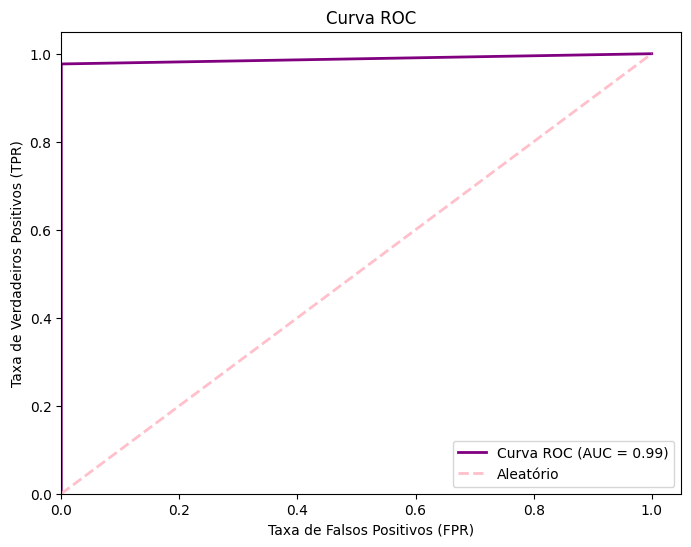

In [11]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr, tpr, thresholds = roc_curve(y_teste, previsao)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


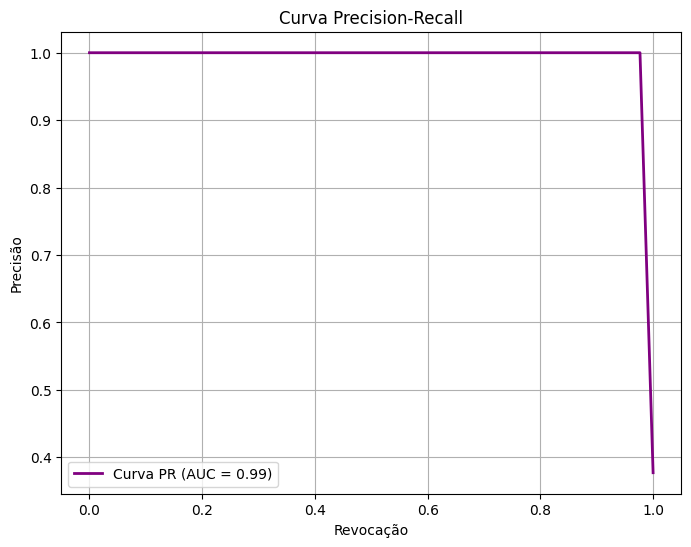

In [12]:


precision, recall, _ = precision_recall_curve(y_teste, previsao)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Curva PR (AUC = %0.2f)' % pr_auc)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [20]:


# Definindo o objeto KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definindo parâmetros para SVM
svm_params = [
    {'C': c, 'gamma': g}
    for c in [2**i for i in range(-5, 16, 2)]
    for g in [2**i for i in range(-15, 4, 2)]
]
# Converter y_treino para um array 1D
y_treino = y_treino.ravel()

# Grid Search para SVM
svm = SVC(kernel='rbf')
best_svm, best_svm_params = grid_search(svm, svm_params, X_treino, y_treino, kf)

print(f"Melhores parâmetros para SVM: {best_svm_params}")



C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Unde

Melhores parâmetros para SVM: {'C': 0.03125, 'gamma': 0.0078125}


C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: Unde

In [21]:
print(f"Tamanho de X_treino: {X_treino.shape}")
print(f"Tamanho de y_treino: {y_treino.shape}")


Tamanho de X_treino: (455, 31)
Tamanho de y_treino: (455,)


In [22]:


# Treinamento final com o melhor modelo SVM
best_svm.fit(X_normalizado_treino, y_treino1)
previsao_svm = best_svm.predict(X_normalizado_teste)

In [23]:
acuracia_final = acuracia(y_teste, previsao_svm)

        
precisao_final = precisao(y_teste, previsao_svm, classe_positiva=1)

        
revocacao_final = revocacao(y_teste, previsao_svm, classe_positiva=1)

        
f1_final = f1(precisao_final, revocacao_final)

In [24]:

print("Acurácia final: ", acuracia_final)

print("Precisão final: ", precisao_media)

print("Revocação final: ", revocacao_final)

print("F1 final: ", f1_final)


Acurácia final:  0.6228070175438597
Precisão final:  0.9826797385620916
Revocação final:  0.0
F1 final:  0


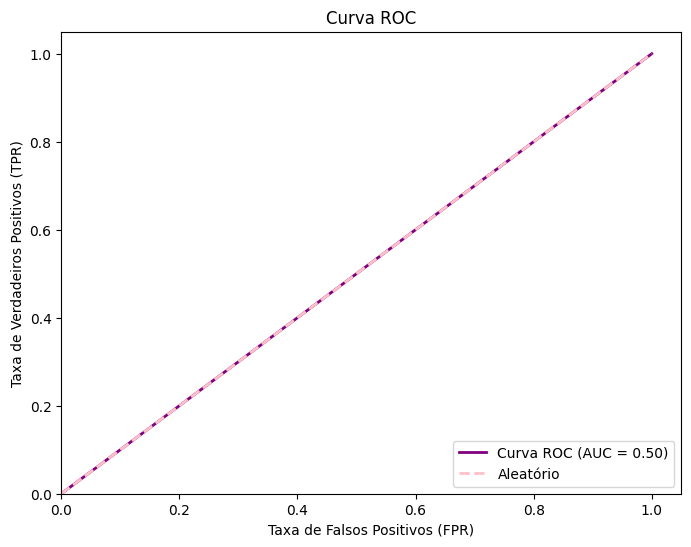

In [25]:
# Calcular as taxas de falsos positivos (FPR) e verdadeiros positivos (TPR)
fpr, tpr, thresholds = roc_curve(y_teste, previsao_svm)
# Calcular a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)
# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', linestyle='--', lw=2, label='Aleatório')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
